In [17]:
from dataloader_classes import Lung_Train_Dataset, Lung_Test_Dataset, Lung_Val_Dataset
from small_functions import learning_curve,load_model, save_model
from threeclasses_classifier import Classifier, train_model

# Torch
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms

import time
import matplotlib.pyplot as plt
import numpy as np

In [18]:
ld_train = Lung_Train_Dataset()
ld_train.describe()
print(len(ld_train))
im, class_oh = ld_train[5215]
print(im.shape)
print(im)
print(class_oh)

This is the training dataset of the Lung Dataset used for the Small Project in the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 5216 images, of size 150 by 150.
The images are stored in the following locations and each one contains the following number of images:
 - train_normal, in folder ./dataset/train/normal/: 1341 images.
 - train_infected(non_covid), in folder ./dataset/train/infected/non-covid/: 2530 images.
 - train_infected(covid), in folder ./dataset/train/infected/covid/: 1345 images.

5216
torch.Size([1, 150, 150])
tensor([[[0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]])
tensor([0., 0., 1.])


In [20]:
ld_test = Lung_Test_Dataset()
ld_test.describe()
print(len(ld_test))
im, class_oh = ld_test[476]
print(im.shape)
print(im)
print(class_oh)

This is the test dataset of the Lung Dataset used for the Small Project in the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 615 images, of size 150 by 150.
The images are stored in the following locations and each one contains the following number of images:
 - test_normal, in folder ./dataset/test/normal/: 234 images.
 - test_infected(non_covid), in folder ./dataset/test/infected/non-covid/: 242 images.
 - test_infected(covid), in folder ./dataset/test/infected/covid/: 139 images.

615
torch.Size([1, 150, 150])
tensor([[[0.2588, 0.3725, 0.4314,  ..., 0.1176, 0.1255, 0.1333],
         [0.3686, 0.4196, 0.4549,  ..., 0.1137, 0.1216, 0.1255],
         [0.4392, 0.4275, 0.4510,  ..., 0.0941, 0.0941, 0.0941],
         ...,
         [0.1647, 0.1765, 0.1412,  ..., 0.1569, 0.1569, 0.1569],
         [0.1647, 0.1725, 0.1373,  ..., 0.1569, 0.1569, 0.1569],
         [0.1608, 0.1725, 0.1373,  ..., 0.1569, 0.1569, 0.1569]]])
tensor([0., 0., 1.])


In [21]:
ld_val = Lung_Val_Dataset()
ld_val.describe()
print(len(ld_val))
im, class_oh = ld_val[15]
print(im.shape)
print(im)
print(class_oh)

This is the validation dataset of the Lung Dataset used for the Small Project in the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 25 images, of size 150 by 150.
The images are stored in the following locations and each one contains the following number of images:
 - val_normal, in folder ./dataset/val/normal/: 8 images.
 - val_infected(non_covid), in folder ./dataset/val/infected/non-covid: 8 images.
 - val_infected(covid), in folder ./dataset/val/infected/covid: 9 images.

25
torch.Size([1, 150, 150])
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0078, 0.0039, 0.0039,  ..., 0.0078, 0.0118, 0.0157],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]])
tensor([0., 1., 0.])


In [22]:
bs_val = 64

In [14]:
# creating dataloader object
train_loader = DataLoader(ld_train, batch_size = bs_val, shuffle = True)
print(train_loader)
test_loader = DataLoader(ld_test, batch_size = bs_val, shuffle = True)
print(test_loader)
val_loader = DataLoader(ld_val, batch_size = bs_val, shuffle = True)
print(val_loader)

In [23]:
# Typical mini-batch for loop on dataloader (train)
for k, v in enumerate(train_loader):
    print("-----")
    print(k)
    print(v[0])
    print(v[1])
    # Forced stop
    break
    #assert False, "Forced stop after one iteration of the for loop"

-----
0
tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.2235, 0.1961, 0.1647],
          [0.0000, 0.0000, 0.0000,  ..., 0.2196, 0.1922, 0.1569],
          [0.0000, 0.0000, 0.0000,  ..., 0.2157, 0.1843, 0.1490],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.2000, 0.1922, 0.1765,  ..., 0.1686, 0.1647, 0.1569],
          [0.1765, 0.1725, 0.1765,  ..., 0.1804, 0.1765, 0.1765],
          [0.1608, 0.1529, 0.1804,  ..., 0.1882, 0.1843, 0.1804],
          ...,
          [0.3686, 0.4196, 0.4667,  ..., 0.0471, 0.0510, 0.0549],
          [0.3647, 0.4118, 0.4588,  ..., 0.0471, 0.0510, 0.0549],
          [0.3647, 0.4039, 0.4510,  ..., 0.0471, 0.0510, 0.0549]]],


        [[[0.2392, 0.2118, 0.2078,  ..., 0.2471, 0.2510, 0.2627],
          [0.2471, 0.2196, 0.2118,  ..., 0.2471, 0.2510, 0.2588],
          [0.2588, 0.2275, 0.2

Testing of the dataloader

Train 3-classes clasifier

In [25]:
# Define loss function for training 
loss_function=nn.NLLLoss()
# Initialise model 
model=Classifier()
# Train model
model=train_model(model,train_loader,test_loader,1,loss_function)

0 ----------------------
[tensor(0.2812)]
1 ----------------------
[tensor(0.2812), tensor(0.3438)]
2 ----------------------
[tensor(0.2812), tensor(0.3438), tensor(0.4062)]
3 ----------------------
[tensor(0.2812), tensor(0.3438), tensor(0.4062), tensor(0.3125)]
4 ----------------------
[tensor(0.2812), tensor(0.3438), tensor(0.4062), tensor(0.3125), tensor(0.3125)]
5 ----------------------
[tensor(0.2812), tensor(0.3438), tensor(0.4062), tensor(0.3125), tensor(0.3125), tensor(0.2812)]
6 ----------------------
[tensor(0.2812), tensor(0.3438), tensor(0.4062), tensor(0.3125), tensor(0.3125), tensor(0.2812), tensor(0.3281)]
7 ----------------------
[tensor(0.2812), tensor(0.3438), tensor(0.4062), tensor(0.3125), tensor(0.3125), tensor(0.2812), tensor(0.3281), tensor(0.2344)]
8 ----------------------
[tensor(0.2812), tensor(0.3438), tensor(0.4062), tensor(0.3125), tensor(0.3125), tensor(0.2812), tensor(0.3281), tensor(0.2344), tensor(0.5000)]
9 ----------------------
[tensor(0.2812), tens

66 ----------------------
[tensor(0.5938), tensor(0.6094), tensor(0.6406), tensor(0.6719), tensor(0.6719), tensor(0.7188), tensor(0.6406)]
67 ----------------------
[tensor(0.5938), tensor(0.6094), tensor(0.6406), tensor(0.6719), tensor(0.6719), tensor(0.7188), tensor(0.6406), tensor(0.6094)]
68 ----------------------
[tensor(0.5938), tensor(0.6094), tensor(0.6406), tensor(0.6719), tensor(0.6719), tensor(0.7188), tensor(0.6406), tensor(0.6094), tensor(0.6094)]
69 ----------------------
[tensor(0.5938), tensor(0.6094), tensor(0.6406), tensor(0.6719), tensor(0.6719), tensor(0.7188), tensor(0.6406), tensor(0.6094), tensor(0.6094), tensor(0.5469)]
Epoch: 0/1 @ 2021-03-18 22:35:09.089301  
 Training Loss: 0.777 -  Training Accuracy: 0.631 -  Validation Loss: 0.736 -  Validation Accuracy: 0.698
70 ----------------------
[tensor(0.6875)]
71 ----------------------
[tensor(0.6875), tensor(0.6250)]
72 ----------------------
[tensor(0.6875), tensor(0.6250), tensor(0.5938)]
73 --------------------

In [28]:
# Save trained model to model folder
model_name='test'
path='./model/'+model_name+'.pt'
save_model(model,path)


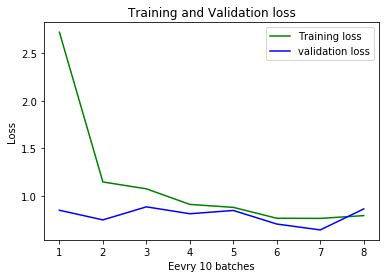

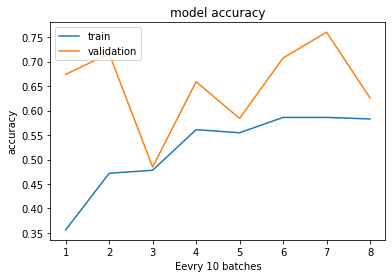

In [33]:
# Plot learning curve and save to folder learningCurve
loss_fig,acc_fig=learning_curve(model.history)
loss_fig.savefig('./learningCurve/loss.jpg')
acc_fig.savefig('./learningCurve/acc.jpg')

In [34]:
# Load model
test_model=load_model('./model/test.pt')
test_model

Classifier(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=82944, out_features=3, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
  (fl): LogSoftmax()
)

In [102]:
"""
ignore this code... its for my reference

from sklearn.metrics import confusion_matrix
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    

#print(predicted_val)
def val_images():
    
    labels=[] #list of ground truth labels in validation
    predicted=[] #list of predicted labels in validation
    model.eval()
    for img,label in ld_val:
        show(img)
        print("Ground truth label: ",label)
        labels.append(label)
        #predicted = model(img)
        #print("Predicted label: ", predicted_val)
        for ls in val_loader:
            for i in ls:
                ls.append(model(i))
        print(ls)
            
        
    

    #confusion matix
    confusion_matrix(labels,predicted)
        
        
        
    return
    
for content in val_loader:
    print(content[0][0])
"""    

In [223]:
import numpy as np
import pandas as pd
#from sklearn.metrics import multilabel_confusion_matrix
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    

#print(predicted_val)
def val_images():
    model.eval()
    for content in val_loader:
        img_ls = content[0] #list of image tensors in validation
        label_ls = content[1] #list of ground truth labels for each image in validation
        predicted = model(img_ls)
        print("predictions", predicted)
        pred_max = predicted.argmax(1)
        print("predicted argmax", predicted)
        pred_labels = torch.zeros (predicted.shape).scatter (1, pred_max.unsqueeze (1), 1.0)
        print("Predicted Labels ",pred_labels)

        for i in range(len(img_ls)):
            show(img_ls[i])
            print("Ground truth label: ",label_ls[i])
            print("Predicted label: ",pred_labels[i])
                
    
    #confusion matix
    label_ls = label_ls.argmax(1)
    #print("label ls", label_ls)
    #print("predicted argmax ls", pred_max)
    #multilabel_confusion_matrix(label_ls.numpy(),predicted.numpy())
    
    #manually build confusion matrix for classes 0,1,2
 
    count00=0
    count01=0
    count02=0
    count10=0
    count11=0
    count12=0
    count20=0
    count21=0
    count22=0 

    for act,pred in zip(label_ls,pred_max):
        if act==torch.Tensor(1).fill_(0):
            if pred==torch.Tensor(1).fill_(0):
                count00+=1
            elif pred==torch.Tensor(1).fill_(1):
                count01+=1
            elif pred==torch.Tensor(1).fill_(2):
                count02+=1
        elif act==torch.Tensor(1).fill_(1):
            if pred==torch.Tensor(1).fill_(0):
                count10+=1
            elif pred==torch.Tensor(1).fill_(1):
                count11+=1
            elif pred==torch.Tensor(1).fill_(2):
                count12+=1
        elif act==torch.Tensor(1).fill_(2):
            if pred==torch.Tensor(1).fill_(0):
                count20+=1
            elif pred==torch.Tensor(1).fill_(1):
                count21+=1
            elif pred==torch.Tensor(1).fill_(2):
                count22+=1
    actual_0 = [count00,count01,count02]
    actual_1 = [count10,count11,count12]
    actual_2 = [count20,count21,count22]
    total = [actual_0,actual_1,actual_2]
    conf_matrix = pd.DataFrame(total, index=['Actual label 0','Actual label 1','Actual label 2'],columns=['Predicted label 0','Predicted label 1','Predicted label 2'])
    
        
        
     
        
    return conf_matrix
    

predictions tensor([[-3.1363, -1.0076, -0.5251],
        [-2.4588, -1.1671, -0.5055],
        [-2.5812, -0.8397, -0.7083],
        [-3.5780, -0.4730, -1.0529],
        [-2.3894, -0.6338, -0.9736],
        [-1.1196, -1.7003, -0.7114],
        [-0.3484, -1.7934, -2.0571],
        [-2.1109, -1.5305, -0.4118],
        [-2.2201, -0.5935, -1.0816],
        [-0.4055, -1.9151, -1.6817],
        [-1.5662, -1.5689, -0.5398],
        [-3.4744, -1.4525, -0.3078],
        [-3.1182, -0.7088, -0.7689],
        [-2.9483, -0.5094, -1.0592],
        [-1.2247, -0.8054, -1.3499],
        [-3.1412, -1.1637, -0.4394],
        [-2.3272, -0.5686, -1.0903],
        [-1.2418, -1.2308, -0.8697],
        [-2.3476, -1.6379, -0.3425],
        [-2.3713, -1.3643, -0.4291],
        [-0.9356, -1.8484, -0.7982],
        [-3.7042, -0.7837, -0.6565],
        [-2.7193, -1.5287, -0.3323],
        [-3.6697, -0.3497, -1.3109],
        [-3.1001, -0.3906, -1.2791]], grad_fn=<LogSoftmaxBackward>)
predicted argmax tensor([[-3.136

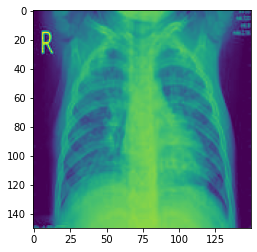

Ground truth label:  tensor([0., 0., 1.])
Predicted label:  tensor([0., 0., 1.])


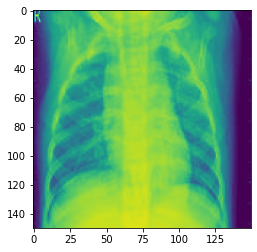

Ground truth label:  tensor([0., 1., 0.])
Predicted label:  tensor([0., 0., 1.])


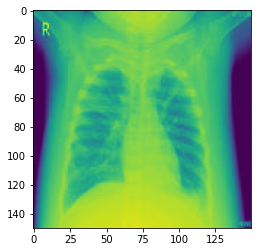

Ground truth label:  tensor([0., 0., 1.])
Predicted label:  tensor([0., 0., 1.])


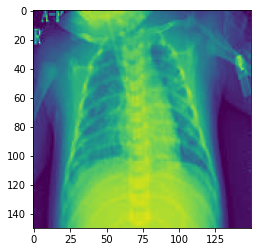

Ground truth label:  tensor([0., 1., 0.])
Predicted label:  tensor([0., 1., 0.])


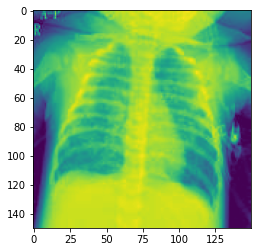

Ground truth label:  tensor([0., 1., 0.])
Predicted label:  tensor([0., 1., 0.])


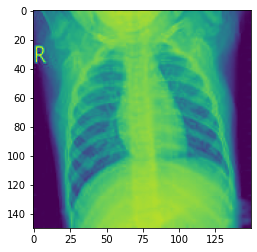

Ground truth label:  tensor([1., 0., 0.])
Predicted label:  tensor([0., 0., 1.])


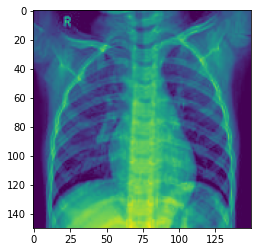

Ground truth label:  tensor([1., 0., 0.])
Predicted label:  tensor([1., 0., 0.])


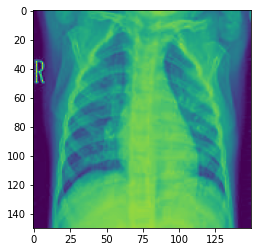

Ground truth label:  tensor([0., 1., 0.])
Predicted label:  tensor([0., 0., 1.])


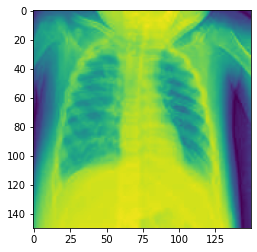

Ground truth label:  tensor([0., 0., 1.])
Predicted label:  tensor([0., 1., 0.])


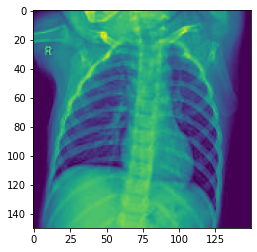

Ground truth label:  tensor([1., 0., 0.])
Predicted label:  tensor([1., 0., 0.])


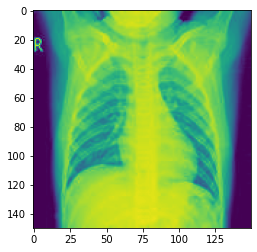

Ground truth label:  tensor([1., 0., 0.])
Predicted label:  tensor([0., 0., 1.])


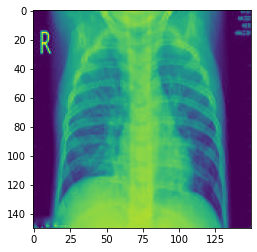

Ground truth label:  tensor([0., 0., 1.])
Predicted label:  tensor([0., 0., 1.])


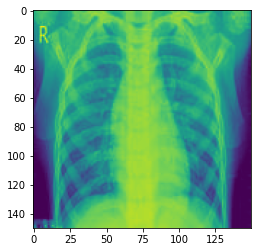

Ground truth label:  tensor([0., 0., 1.])
Predicted label:  tensor([0., 1., 0.])


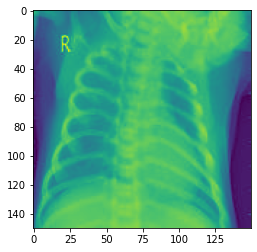

Ground truth label:  tensor([0., 0., 1.])
Predicted label:  tensor([0., 1., 0.])


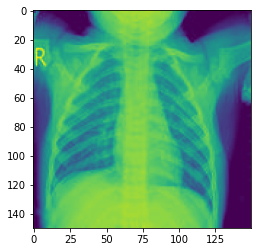

Ground truth label:  tensor([1., 0., 0.])
Predicted label:  tensor([0., 1., 0.])


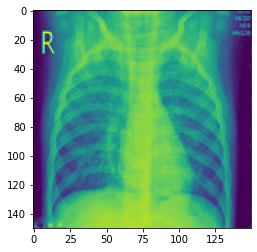

Ground truth label:  tensor([0., 0., 1.])
Predicted label:  tensor([0., 0., 1.])


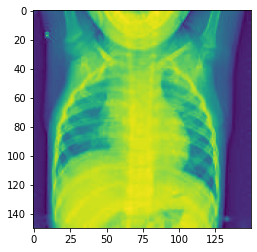

Ground truth label:  tensor([1., 0., 0.])
Predicted label:  tensor([0., 1., 0.])


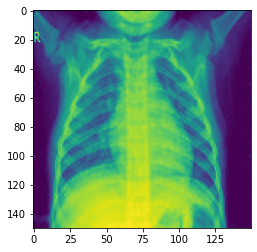

Ground truth label:  tensor([1., 0., 0.])
Predicted label:  tensor([0., 0., 1.])


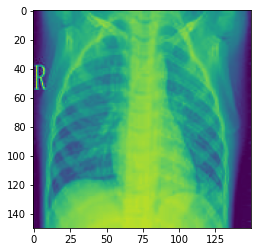

Ground truth label:  tensor([0., 1., 0.])
Predicted label:  tensor([0., 0., 1.])


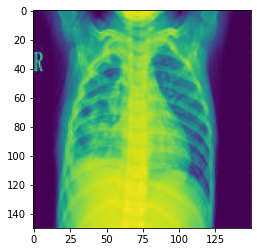

Ground truth label:  tensor([0., 1., 0.])
Predicted label:  tensor([0., 0., 1.])


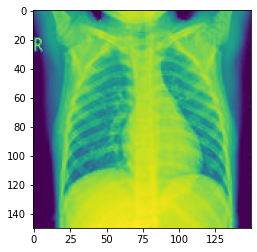

Ground truth label:  tensor([1., 0., 0.])
Predicted label:  tensor([0., 0., 1.])


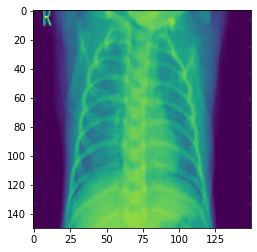

Ground truth label:  tensor([0., 0., 1.])
Predicted label:  tensor([0., 0., 1.])


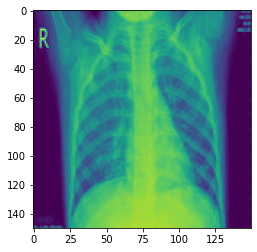

Ground truth label:  tensor([0., 0., 1.])
Predicted label:  tensor([0., 0., 1.])


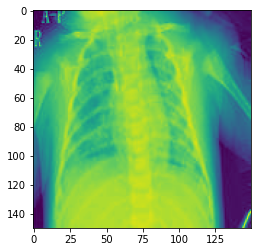

Ground truth label:  tensor([0., 1., 0.])
Predicted label:  tensor([0., 1., 0.])


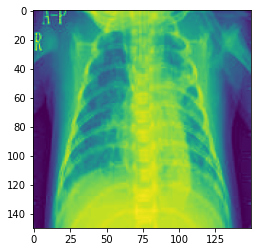

Ground truth label:  tensor([0., 1., 0.])
Predicted label:  tensor([0., 1., 0.])


,Predicted label 0,Predicted label 1,Predicted label 2
Actual label 0,2,2,4
Actual label 1,0,4,4
Actual label 2,0,3,6


In [224]:
val_images()